In [1]:
#loading all the required libraries

library(tidyverse)
library(tidymodels)
library(repr)
library(httr)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Introduction

Marketing is a key component in determining the success of a business and big companies spend millions on marketing alone each year. A marketing campaign that resonates with the general public and the focus group of the company can help in a huge increase in the sales of a product and can lead to an unprecedented growth of the company. 

Marketing campaigns, if done right, can help build a brand that disrupts the current status quo and bring in goods and services at a much more competitive pricing and quality level helping in improving the consumer’s lifestyles.

However, there have been numerous instances in the past where lack of comprehensive and in depth information about the customer has cost a company fatal losses and at times, complete backlash from the people affecting the public image of a brand. 
Taking this into account, it is an absolute necessity for a company to understand the behaviour of its audience and for this, various studies have been conducted. 

One of them is the The customer personality analysis, extracted from Kaggle, which can be used to find out the relationship between the income levels and amount of gold purchased and how that will be useful in predicting the marital status of a given individual. 
The customer personality analysis dataset is an analysis of a company’s target audience which helps the company better focus on improving their products based on their customers’ preferences. It helps the company understand their consumers and make them more accurate while employing marketing strategies to attract more business and thus plays a vital role in the success of an ad campaign. 


# Preliminary exploratory data analysis

### Loading the dataset into R

In [2]:
marketing <- read_tsv("dataset/marketing_campaign.csv")
marketing

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635,0,1,13-11-2012,34,235,⋯,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454,1,0,08-05-2013,32,76,⋯,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351,1,0,06-06-2013,19,14,⋯,9,0,0,0,0,0,0,3,11,1


### Summarizing the data:

This step is to summarize the data in terms of Marital_status of the customer.

In [3]:
marketing_summary <- marketing |>
    select(-ID) |>
    group_by(Marital_Status) |>
    summarize(mean_income = mean(Income, na.rm = TRUE),
              mean_gold = mean(MntGoldProds, na.rm = TRUE))
marketing_summary

Marital_Status,mean_income,mean_gold
<chr>,<dbl>,<dbl>
Absurd,72365.50,204.00000
Alone,43789.00,27.00000
Divorced,52834.23,46.28879
Married,51724.98,42.82292
Single,50995.35,43.72917
Together,53245.53,42.99483
Widow,56481.55,56.76623
YOLO,48432.00,42.00000


## Visualization:

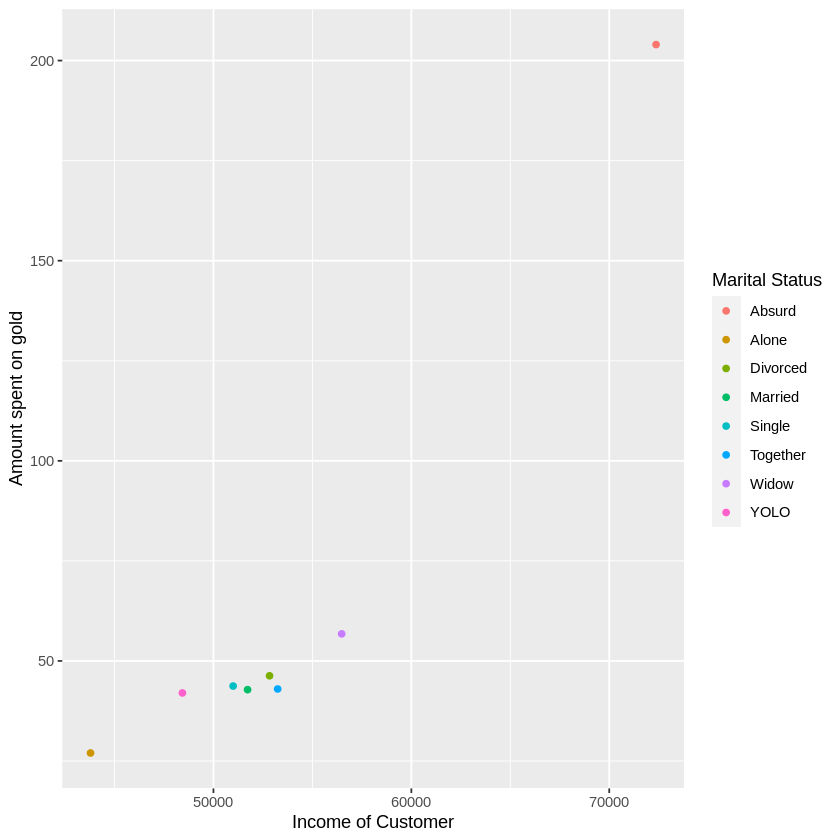

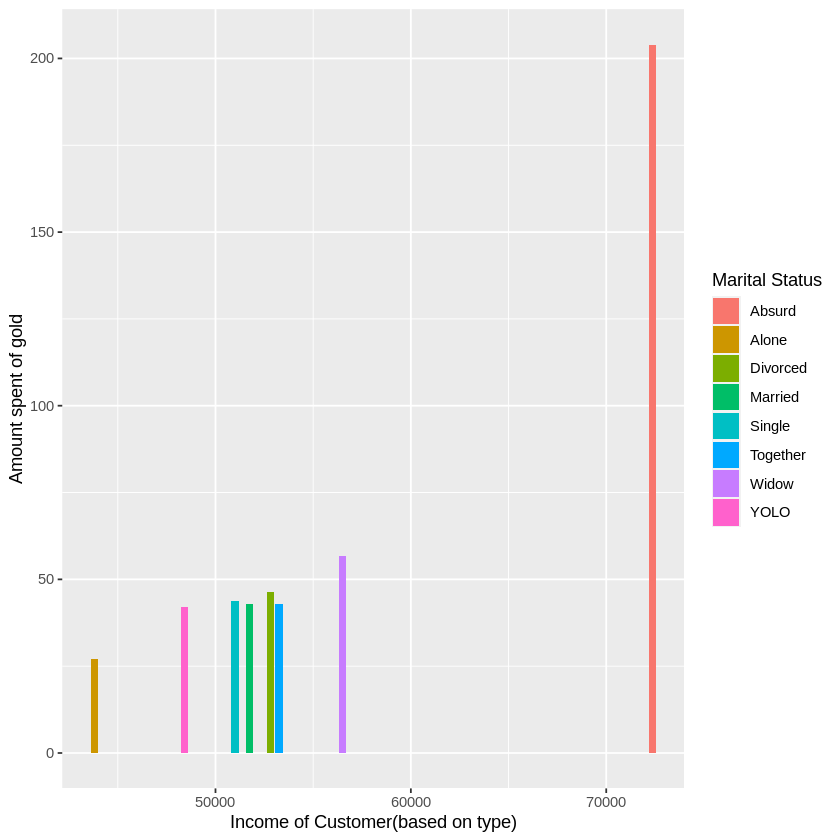

In [7]:
marketing_plot <- ggplot(marketing_summary, aes(x = mean_income, y = mean_gold)) +
                  geom_point(aes(color = Marital_Status)) +
                  labs(x = "Income of Customer", y = "Amount spent on gold", color = "Marital Status")
marketing_plot

marketing_bar <- ggplot(marketing_summary, aes(x = mean_income, y = mean_gold, fill = Marital_Status)) +
                    geom_bar(stat = "identity", position = "dodge") +
                    xlab("Income of Customer(based on type)") +
                    ylab("Amount spent of gold") +
                    labs(fill = "Marital Status")
marketing_bar